## Подготовка данных

In [2]:
train = pd.read_csv('/gold_recovery_train_new.csv')
test = pd.read_csv('/gold_recovery_test_new.csv')
full = pd.read_csv('/gold_recovery_full_new.csv')

In [3]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Имеем три датасета - сырые данные выгружены прямиком с датчиков флотационных установок. Они не обработаны и не подготовлены для исследования, однако уже разделены заказчиком на три датасета:  
1. **`Train.`** Представляет собой датасет с набором объектов и признаков этих объектов. Содержит внушительное число столбцов - 87, а также огромное количество пропущенных значений. 
2. **`Test`** Датасет для проверки постоенной модели. Содержит небольшое, относительно Train, число солбцов. Также содержит пропуски
3. **`Full`** Датасет со всеми значениями. содержит еще больше столбцов, чем Train также (91), пропущенных значения имеютсся.

По итогам можно сформировать несколько наблюдений и выводов:    

1. **Целевой признак — Recovery золота после флотации и в финальном концентрате.**  Понятна важность Recovery  в финальном концентрате. Важность Recovery после флотации объясняется, на мой взгляд, тем, что  на результат флотации влияет множество переменных (количества и соотношение реактивов, качество пульпы, параметры флотационных установок. Один невзрачный на первый взгляд параметр флотации может оказывать выраженное влияние на качество обогащения вцелом (final), в то время как очистка более простой и предсказуемый процесс.  Кроме того, данные огромны и непонятны. Важность или неважность каждого из признаков нужно устанавливать самостоятельно. В боевых условиях, конечно, потребовался бы более глубокий заплыв в методические материалы, которые, возможно, могут быть получены или порекомендованы заказчиком. 
2. **Восстановить целевой признак на тестовой выборке возможно только по дате.** Дата - своебразный уникальный индекс для этого исследования. Замечено, что данные, близкие по дате (например, снятые с разницей в час) оченьпохожи друг на друга - это хорошие новости, значит в них есть закономерность, которая пригодится при восстановлении пропущенных значений. 
3. **Столбцы перемешаны относительно стадий технологического процесса** - необходима работа по восстановлению потрядка и приведению признаков к некой системности, которая внесёт в ясность в данные, лежащие перед нами.
4. Процитирую слова старшего студента нашей когорты: 
> При работе с выбросами, нет рекомендаций к их удалению, говорят так 'на усмотрение бизнеса'.  Ведь выбросы - это и есть реальная концентрация. И нам важно, чтобы модель умела и их тоже видеть и обрабатывать. Если их убрать из модели, то получится, что у нас она станет как бы искусственной. Т.е. будет работать только в небольших диапазонах - потому что обучалась только в них.

    **Из чего следует, что выбросы удалять не нужно.**
   
      

*Промежуточные итоги*

На первый взгляд целевые признаки могут показаться связанными друг с другом: Recovery после флотациии - важный промежуточный этап, посмотрев на результаты которого, можно многое сказать о ходе процесса. Имеет место слабовыраженная корреляция.

In [4]:
full['rougher.output.recovery'].corr(full['final.output.recovery'])

0.3270587324133113

### Восстановление последовательности технологического процесса

Итак, в ходе изучения данных все столбцы были раделены по этапам и выстроены согласно последовательности технологического процесса.

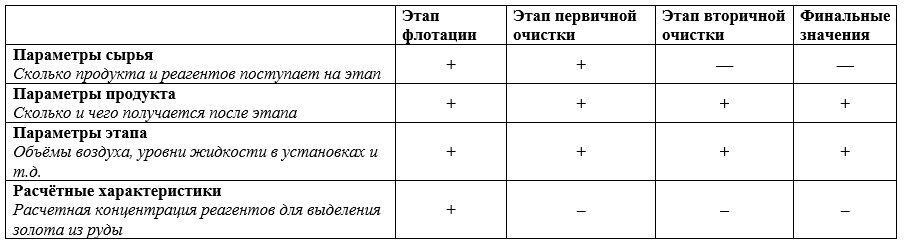

Заметно, например, что самый подробно представленный этап в наших данных - это флотация. Про этап вторичной очистки и про финальные показатели информации не очень много.  
Расчётные характеристики выделяются только для флотации, параметры сырья и продукта известны только для первых двух этапов.   

 
 Для дальнейших исследований необходимо заполнить пропуски. 

### Заполнение пропусков 

Пропуски типа MAR, их восстановление или заполнение возможно на основе имеющихся данных. 
Обратимся к ad-hoc методам  для заполнения пропущенных значений: нам пригодится свойство столбца `date`.  
Нетрудно заметить, что близкие по дате и времени значения похожи. 
 - `ffil()` заполнит пропуски последним наблюдаемым объектом; 
 - `interpolate()` - интерполируемой величиной, рассчитанной с соседних значений. 
 
Выберем интерполяцию, чтобы не плодить в датасете пары одинаковых значений.

In [5]:
train.interpolate(inplace = True)
test.interpolate(inplace = True)
full.interpolate(inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


### Проверка правильности рассчёта эффективности обогащения

выполняется для целевого признака `rougher.output.recovery` по формуле, предоставленной заказчиком. Вычислим recovery на обучающей выборке, а после сравним её с реальным значением признака.

Для начала проанализируем полученную нами формулу:

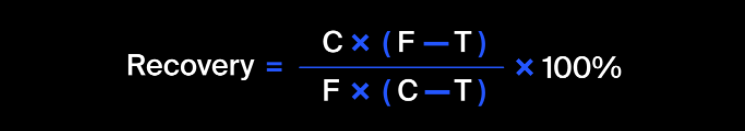

C — доля золота в концентрате после флотации/очистки;  
F — доля золота в сырье/концентрате до флотации/очистки;  
T — доля золота в отвальных хвостах после флотации/очистки.  

Recovery **увеличивается** с ростом доли золота в итоговом продукте **С**, а также с увеличением разницы **(F - T)**, то есть с увеличением разрыва между концентрациями золота в сырье и отвальных хвостах. 

Recovery **уменьшается** с ростом доли золота в сырье **F**, а также с увеличением разницы **(С-Т)**, т.е. с увеличением разрыва между концентрацией золота в концентрате  и в отвальных хвостах.

Соответственно, recovery нам надо **уменьшать**

In [6]:
# Воспользуемся условными обозначениями:
#C = rougher.output.concentrate_au
#F = rougher.input.feed_au
#T = rougher.output.tail_au
recovery = []
for i in range(train.shape[0]):
    C = train['rougher.output.concentrate_au'][i]
    F = train['rougher.input.feed_au'][i]
    T = train['rougher.output.tail_au'][i]
    value = (C * (F - T) * 100) / (F * (C - T))
    recovery.append(value)
print('MAE:', mean_absolute_error(train['rougher.output.recovery'], recovery))

MAE: 1.1131451184435918e-14


In [7]:
full.duplicated().sum()

0

Быстрая проверка на дупликаты — таковых не обнаружено.

<b>ВЫВОД:</b> формула достаточно чётко описывает реальный процесс. Неизвестно, как замеряли recovery. Вполне возможно,что показатель был автоматически рассчитан на соответствующих данных в момент их получения или замера — таким образом, можно сделать вывод о том, что зная три признака из столбцов <code>rougher.output.concentrate_au, rougher.input.feed_au, rougher.output.tail_au</code>, математическим путём можно получить очень близкое к реальному значение, а также то, что четыре признака будут выраженно коррелировать между собой (что естественно, ведь их зависимость даже описана формулой!). Это нужно будет иметь ввиду при построении модели.  

_____________________________
### Анализ признаков, недоступных в тестовой выборке

При разборе каждого столбца в отдельности, на тестовой выборке были замечены несколько закономерностей.

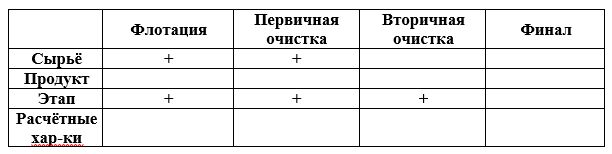

Из теста убрали:
1. Вообще все признаки, которые мы обознчили как **С, F** и **Т**, не только для золота, но и для остальных металлов.  
2. Все признаки всех продуктов  
3. Все расчётные характеристики  
4. Все финальные зарактеристики  

Одним словом всё, что может повлиять на результат или сильно с ним коррелировать, а также всё, что самим результатом и является (все характеристики продукта). 
Оставили характеристки, влияние которых на конечный продкт представляет интерес: 
  - например, расчётных характеристики реагентов, пенообразователей и депрессантов, размера частиц, а также физических условий проведения флотации и очистки - важно посмотреть, как такое сочетание веществ скажется на результатах обогащения.
  
*Примечание: во время выполнения проекта мне было не совсем ясно, что такое sol. Преподаватель сказал, что это сульфат, но я не совсем согласна. Сульфат (sulf) и sol имеют разные частотные отрезкт в химической номенклатуре, и sol скорее подходит под растворитель, раствор или золь. Металлом это тоже скорее всего не будет. Также преподаватель упомянул, что это бесполезный для исследования признак, наряду с концентрацией свинца и серебра. С удалением этого признака я частично не согласна, далее будет обоснование*

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea


<b>ВЫВОД:</b> Закончен этап ознакомления с датасетами и частичной предобработки данных.

## Анализ данных

### Изменение концентрации металлов на различных этапах обогащения руды
Задача: посмотреть, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.   
Используемые стобцы: 
  
**Флотация:**           `rougher.output.cooncentrate_ag, pb, au`  
**Первичная очистка:**  `primary_cleaner.output.concentrate_ag, pb, au`  
**Вторичная очистка:**  `secondary_cleaner.output.concentrate_ag, pb, au`  
**Финал:**              `final.output.concentrate_ag, pb, au`  

_______________

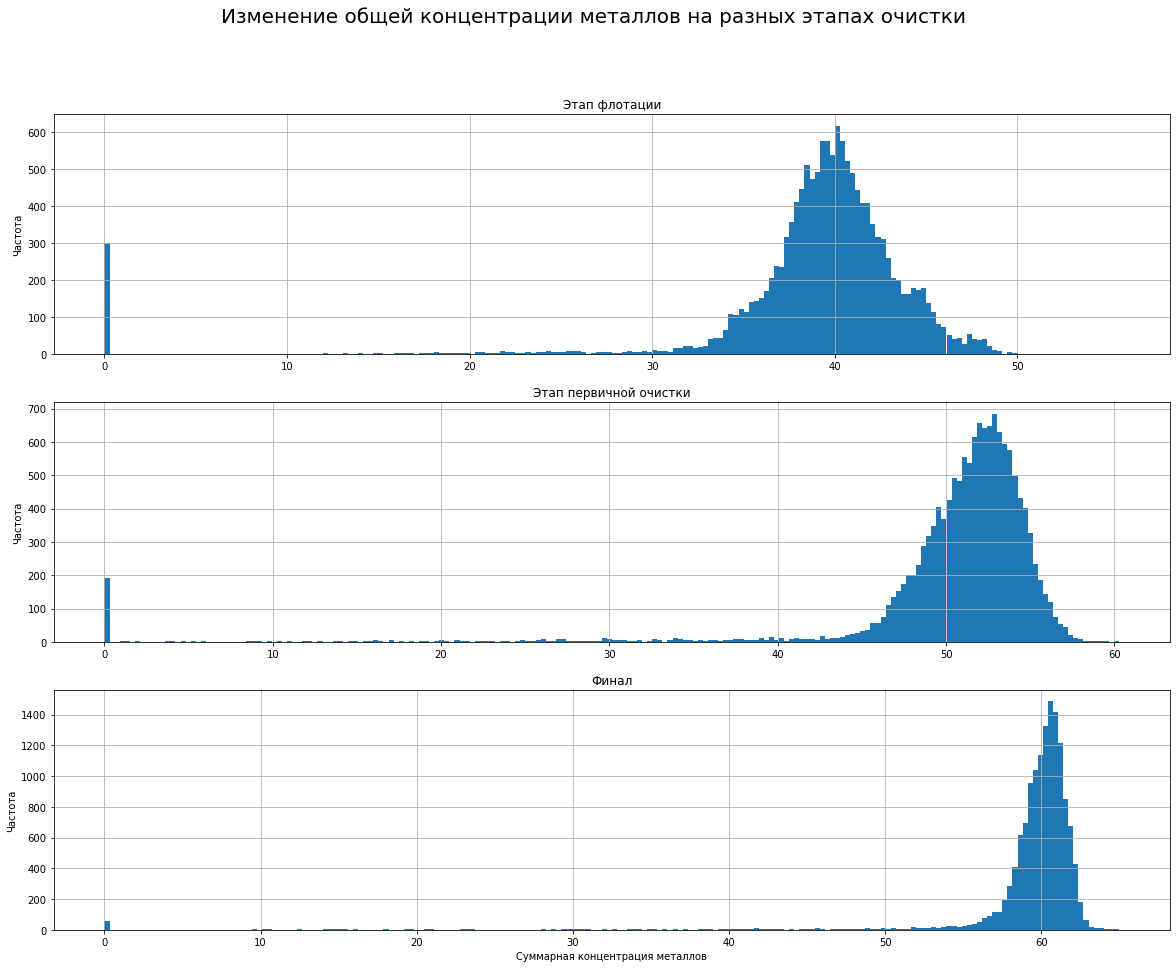

In [9]:
fig = plt.figure()
fig.suptitle('Изменение общей концентрации металлов на разных этапах очистки', fontsize=20)

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

all_rougher = pd.Series(train['rougher.output.concentrate_ag'] +
                        train['rougher.output.concentrate_pb'] +
                        train['rougher.output.concentrate_au'])
all_primary = pd.Series(train['primary_cleaner.output.concentrate_ag'] +
                        train['primary_cleaner.output.concentrate_pb'] +
                        train['primary_cleaner.output.concentrate_au'])
all_final = pd.Series(train['final.output.concentrate_ag'] +
                        train['final.output.concentrate_pb'] +
                        train['final.output.concentrate_au'])


all_rougher.hist(ax = ax1, bins = 200, figsize = (5, 10))
all_primary.hist(ax = ax2, bins = 200, figsize = (20, 15))
all_final.hist(ax = ax3, bins = 200, figsize = (20, 15))


ax1.set_title('Этап флотации')

ax2.set_title('Этап первичной очистки')
ax3.set_title('Финал')

ax1.set_ylabel('Частота')
ax2.set_ylabel('Частота')
ax3.set_ylabel('Частота')

ax3.set_xlabel('Суммарная концентрация металлов')

plt.show()

**Вывод:** от этапа флотации до финала суммарная концентрация металлов увеличивается - в этом и заключается смысл обогащения руды.
Распределение близко к нормальному, симметрично, или немного смещено влево (имеет "хвост" в области низких концентраций).

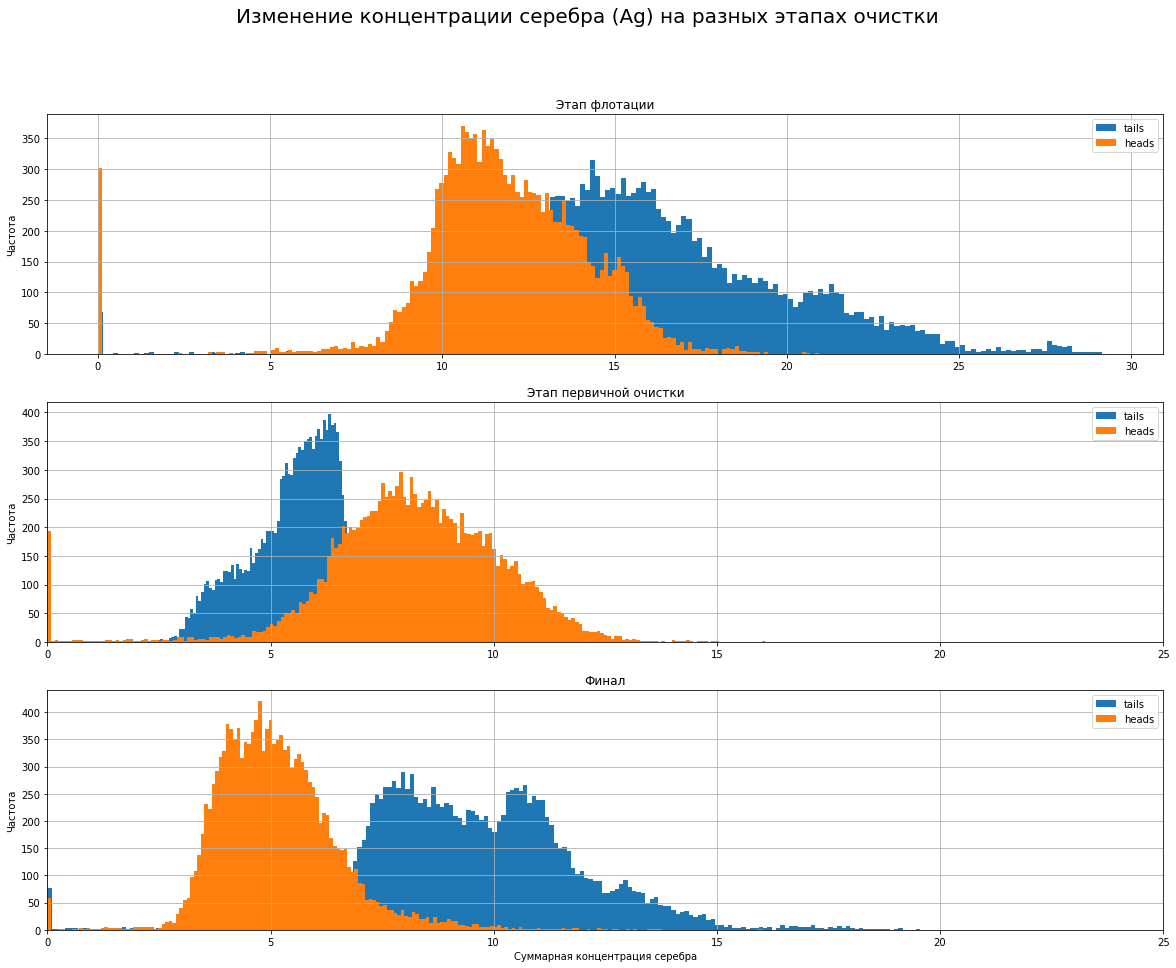

In [10]:
fig = plt.figure()
fig.suptitle('Изменение концентрации серебра (Ag) на разных этапах очистки', fontsize=20)

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)


train['final.output.tail_ag'].hist(ax = ax3, bins = 200, figsize = (20, 15), label = 'tails')
train['rougher.output.tail_ag'].hist(ax = ax2, bins = 200, figsize = (20, 15), label = 'tails')
train['primary_cleaner.output.tail_ag'].hist(ax = ax1, bins = 200, figsize = (20, 15), label = 'tails')
train['rougher.output.concentrate_ag'].hist(ax = ax1, bins = 200, figsize = (20, 15), label = 'heads')
train['primary_cleaner.output.concentrate_ag'].hist(ax = ax2, bins = 200, figsize = (20, 15), label = 'heads')
train['final.output.concentrate_ag'].hist(ax = ax3, bins = 200, figsize = (20, 15), label = 'heads')

ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_title('Этап флотации')
ax2.set_title('Этап первичной очистки')
ax3.set_title('Финал')

ax1.set_ylabel('Частота')
ax2.set_ylabel('Частота')
ax3.set_ylabel('Частота')

ax3.set_xlabel('Суммарная концентрация серебра')
ax2.set_xlim(0, 25)
ax3.set_xlim(0, 25)

plt.show()

**Вывод:** может флотация - не самый выгодный способ обогащения серебросодержащей руды? В хвостах концентрация металла чаще всего выше, чем в финальном продукте.

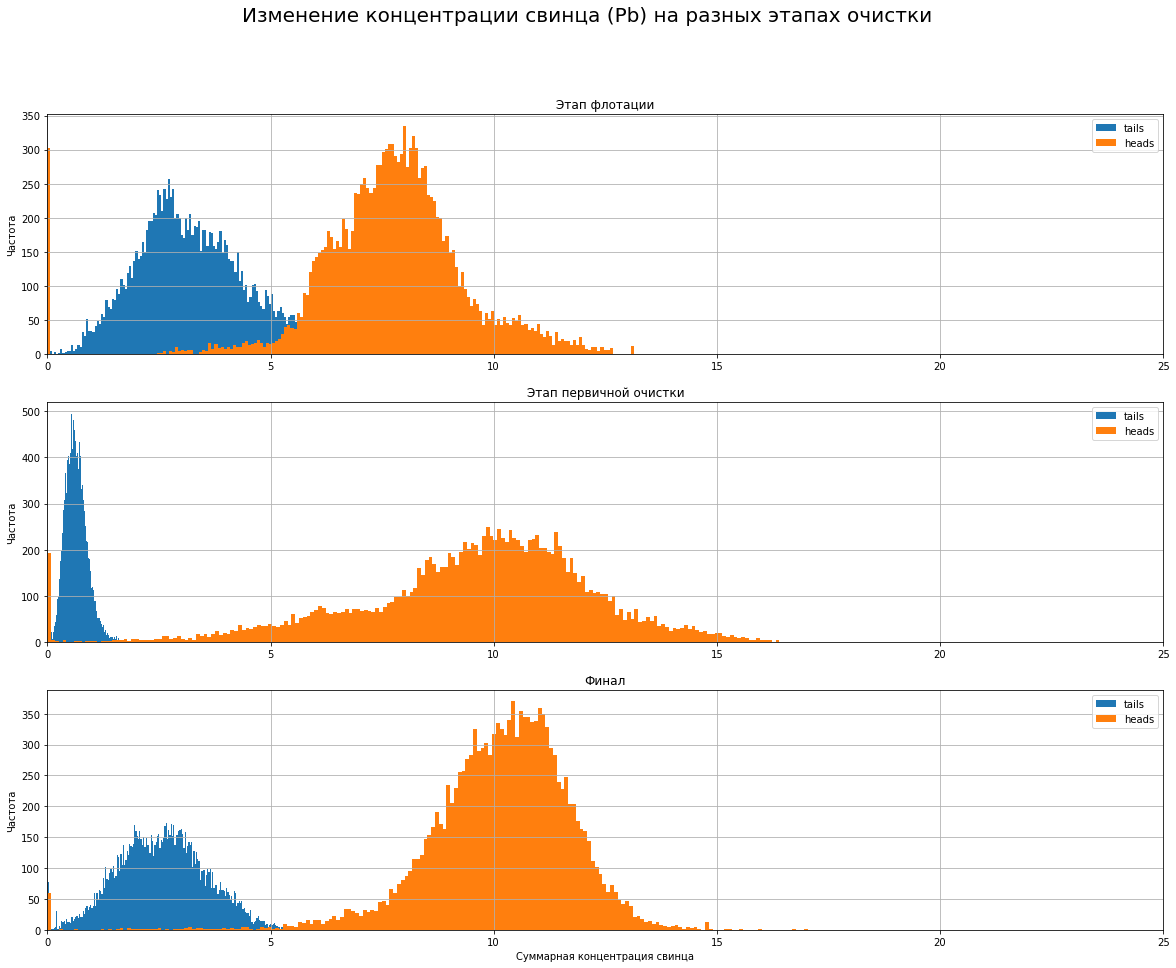

In [11]:
fig = plt.figure()
fig.suptitle('Изменение концентрации свинца (Pb) на разных этапах очистки', fontsize=20)

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)


train['final.output.tail_pb'].hist(ax = ax3, bins = 200, figsize = (20, 15), label = 'tails')
train['rougher.output.tail_pb'].hist(ax = ax2, bins = 200, figsize = (20, 15), label = 'tails')
train['primary_cleaner.output.tail_pb'].hist(ax = ax1, bins = 200, figsize = (20, 15), label = 'tails')
train['rougher.output.concentrate_pb'].hist(ax = ax1, bins = 200, figsize = (20, 15), label = 'heads')
train['primary_cleaner.output.concentrate_pb'].hist(ax = ax2, bins = 200, figsize = (20, 15), label = 'heads')
train['final.output.concentrate_pb'].hist(ax = ax3, bins = 200, figsize = (20, 15), label = 'heads')

ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_title('Этап флотации')
ax2.set_title('Этап первичной очистки')
ax3.set_title('Финал')

ax1.set_ylabel('Частота')
ax2.set_ylabel('Частота')
ax3.set_ylabel('Частота')

ax3.set_xlabel('Суммарная концентрация свинца')
ax1.set_xlim(0, 25)
ax2.set_xlim(0, 25)
ax3.set_xlim(0, 25)

plt.show()

**Вывод:** совсем не похоже на серебро. Эффективность выделения свинца с использованием флотации очевидно даёт лучшие результаты - концентрация увеличивается от этапа к этапу, она "концентрирутся" в районе 10 ед. Хвосты в целом менее богаты металлом. 

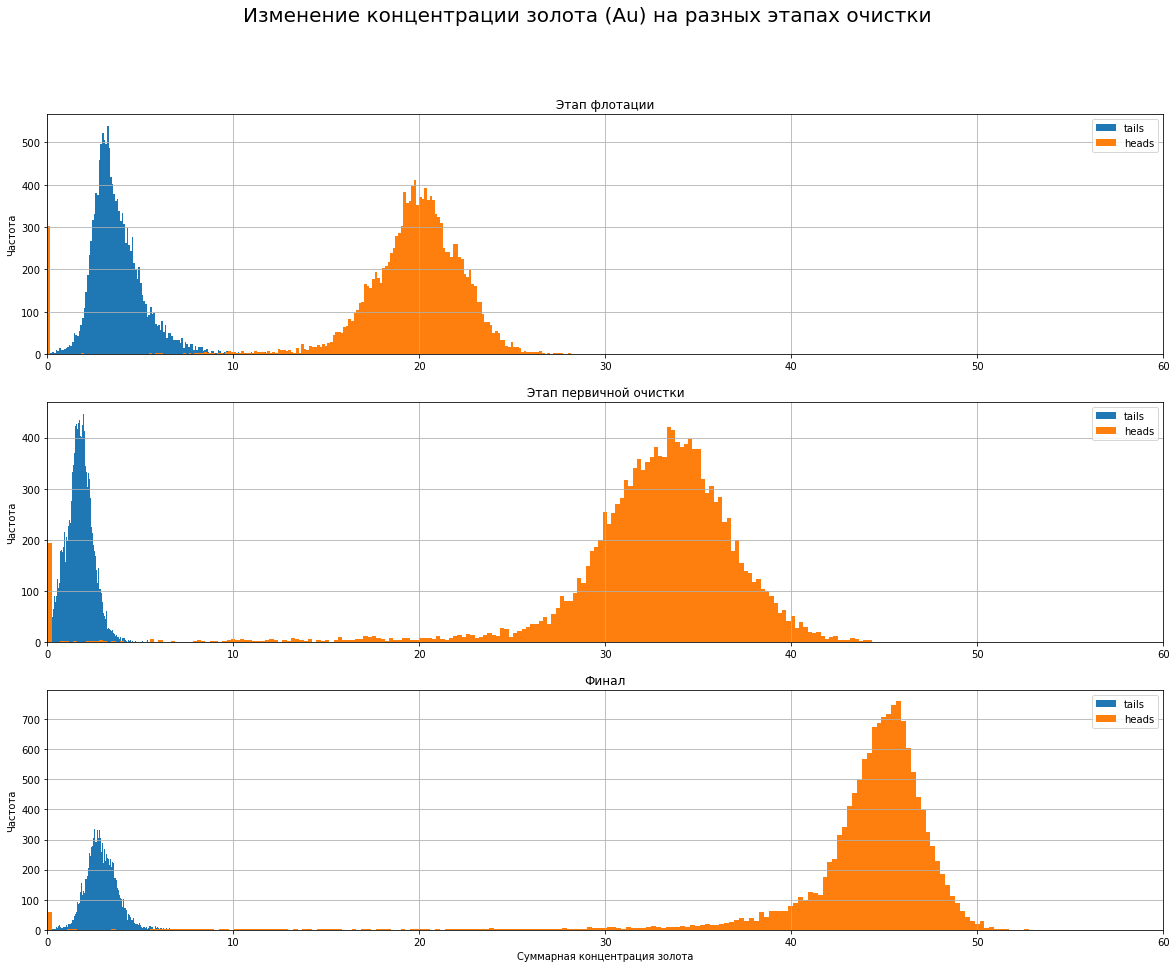

In [12]:
fig = plt.figure()
fig.suptitle('Изменение концентрации золота (Au) на разных этапах очистки', fontsize=20)

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)


train['final.output.tail_au'].hist(ax = ax3, bins = 200, figsize = (20, 15), label = 'tails')
train['rougher.output.tail_au'].hist(ax = ax2, bins = 200, figsize = (20, 15), label = 'tails')
train['primary_cleaner.output.tail_au'].hist(ax = ax1, bins = 200, figsize = (20, 15), label = 'tails')
train['rougher.output.concentrate_au'].hist(ax = ax1, bins = 200, figsize = (20, 15), label = 'heads')
train['primary_cleaner.output.concentrate_au'].hist(ax = ax2, bins = 200, figsize = (20, 15), label = 'heads')
train['final.output.concentrate_au'].hist(ax = ax3, bins = 200, figsize = (20, 15), label = 'heads')

ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_title('Этап флотации')
ax2.set_title('Этап первичной очистки')
ax3.set_title('Финал')

ax1.set_ylabel('Частота')
ax2.set_ylabel('Частота')
ax3.set_ylabel('Частота')

ax3.set_xlabel('Суммарная концентрация золота')
ax1.set_xlim(0, 60)
ax2.set_xlim(0, 60)
ax3.set_xlim(0, 60)

plt.show()

**Вывод:** эффективность разделения золота не вызывает сомнений. В среднем от этапа к этапу концентрация золота в продукте увеличивается. В хвостах ценного металла остаётся совсем немного.

<b>ВЫВОД:</b> Исслевованные нами распределения имеет аномалию: суммарная концентрация металлов не может быть равна нулю. 
    
Эта ситуация требует уточнения у заказчика. 

### Проверка схожести распределения признаков размеров гранул в признаках обучающей и тестовой выборках 
**Задача:** сравнить распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.   

**Используемые стобцы:**
`rougher.input.feed_size` и `primary_cleaner.input_feed_size` на выборках `train ` и `test`

Результаты дополним ttest-ом.

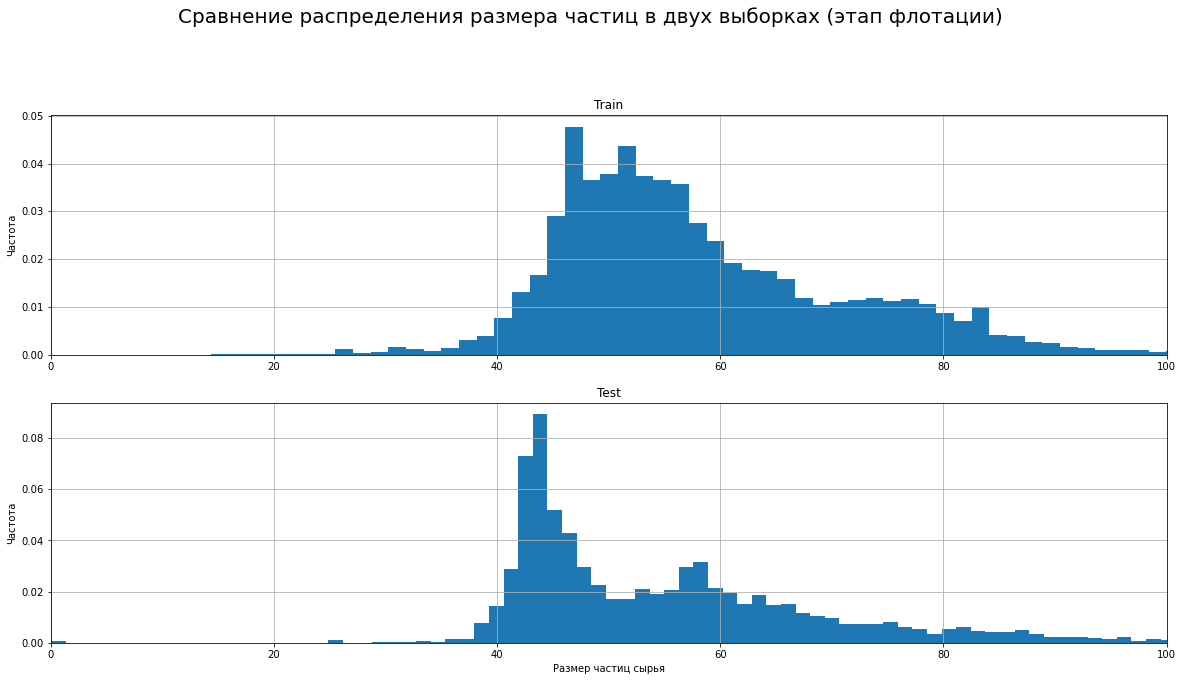

In [13]:
fig = plt.figure()
fig.suptitle('Сравнение распределения размера частиц в двух выборках (этап флотации)', fontsize=20)
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)

train['rougher.input.feed_size'].hist(ax = ax1, bins = 300, figsize = (20, 15), label = 'Этап флотации - обучающая', density = True)
test['rougher.input.feed_size'].hist(ax = ax2, bins = 300, figsize = (20, 15), label = 'Этап флотации - тестовая', density = True)

ax1.set_title('Train')
ax2.set_title('Test')

ax1.set_ylabel('Частота')
ax2.set_ylabel('Частота')

# в обоих распределениях имеются выбросы - крупные куски материала, их размер доходит до 300. 
# здесь ограничимся пределами размера частиц 0-100
ax2.set_xlabel('Размер частиц сырья')
ax1.set_xlim(0, 100)
ax2.set_xlim(0, 100)

plt.show()

**Рабочие гипотезы**  

   **H0:** распределения признака размера частиц на двух выборках не отличаются один от другого  
   **H1:** распределения признака размера частиц на двух выборках различны

In [14]:
alpha = 0.05 
results = st.ttest_ind(train['rougher.input.feed_size'], test['rougher.input.feed_size'], 
                       equal_var = True, alternative='two-sided')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.0469277188265707e-31
Отвергаем нулевую гипотезу


**Вывод:** различия, обнаруженные в распределении двух выборок статистически значимы. Распределения не похоже на нормальное, и друг на друга похожи только отчасти. В обоих графиках наблюдаются два пика, которые на тестовой выборке как будто становятся "ближе"

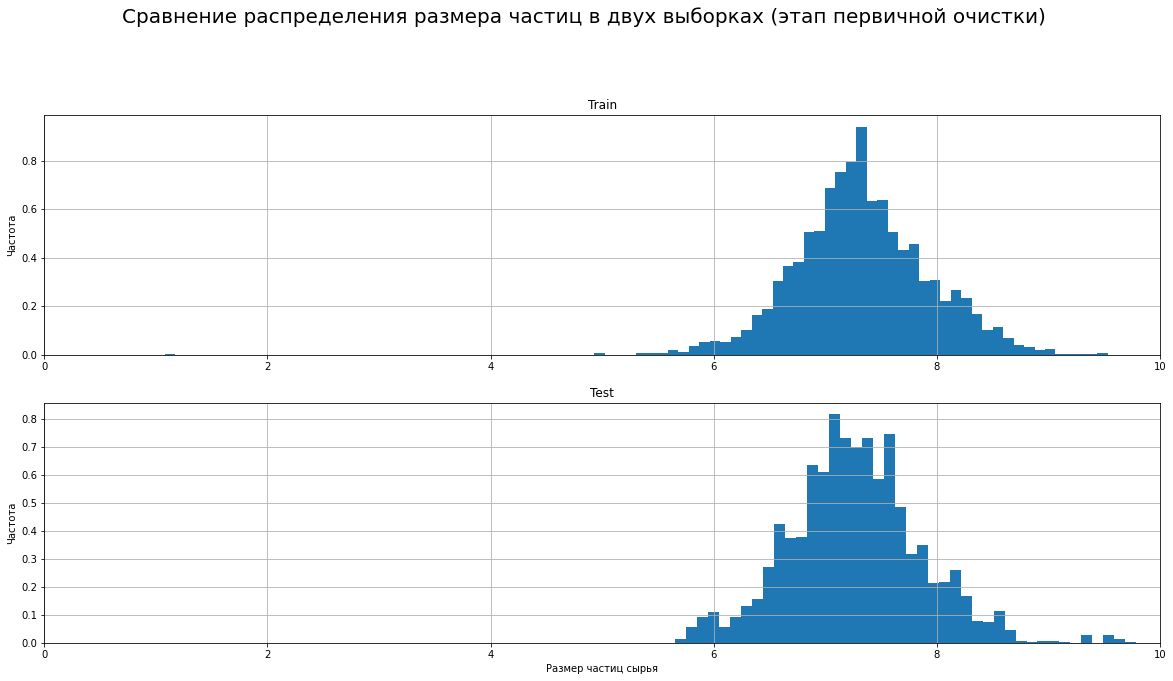

In [15]:
fig = plt.figure()
fig.suptitle('Сравнение распределения размера частиц в двух выборках (этап первичной очистки)', fontsize=20)
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)

train['primary_cleaner.input.feed_size'].hist(ax = ax1, bins = 100, figsize = (20, 15), density = True)
test['primary_cleaner.input.feed_size'].hist(ax = ax2, bins = 100, figsize = (20, 15), density = True)

ax1.set_title('Train')
ax2.set_title('Test')

ax1.set_ylabel('Частота')
ax2.set_ylabel('Частота')

ax2.set_xlabel('Размер частиц сырья')
ax1.set_xlim(0, 10)
ax2.set_xlim(0, 10)

plt.show()

In [16]:
alpha = 0.05 
results = st.ttest_ind(train['primary_cleaner.input.feed_size'], test['primary_cleaner.input.feed_size'],
                       equal_var = True, alternative='two-sided')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4864182925957636e-08
Отвергаем нулевую гипотезу


<b>ВЫВОД:</b> крайне желательно свести различия между двумя выборками к минимуму - это позволит построить более точную модель. Распределение для тестовой выборки немного отличается от такового для обучающей - первое сдвинуто немного в меньшую сторону. НО в целом размеры большинства частиц лежат в оптимальном интервале  40—100 мкм  («Флотация руды»: ООО "Техноаналитприбор", информация с https://techade.ru/stati/flotatsiya-rudy) для обоих выборок. Будем считать, что выборки подходят для оценки.

### Иссдедование суммарной концентрации веществ

**Задача:** исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [17]:
full['rougher.output.concentrate_all'] = full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_ag'] 
full['rougher.input.feed_all'] = full['rougher.input.feed_au'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_ag'] 
full['primary_cleaner.output.concentrate_all'] = full['primary_cleaner.output.concentrate_au'] + full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_ag'] 
full['final.output.concentrate_all'] = full['final.output.concentrate_au'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_ag'] 

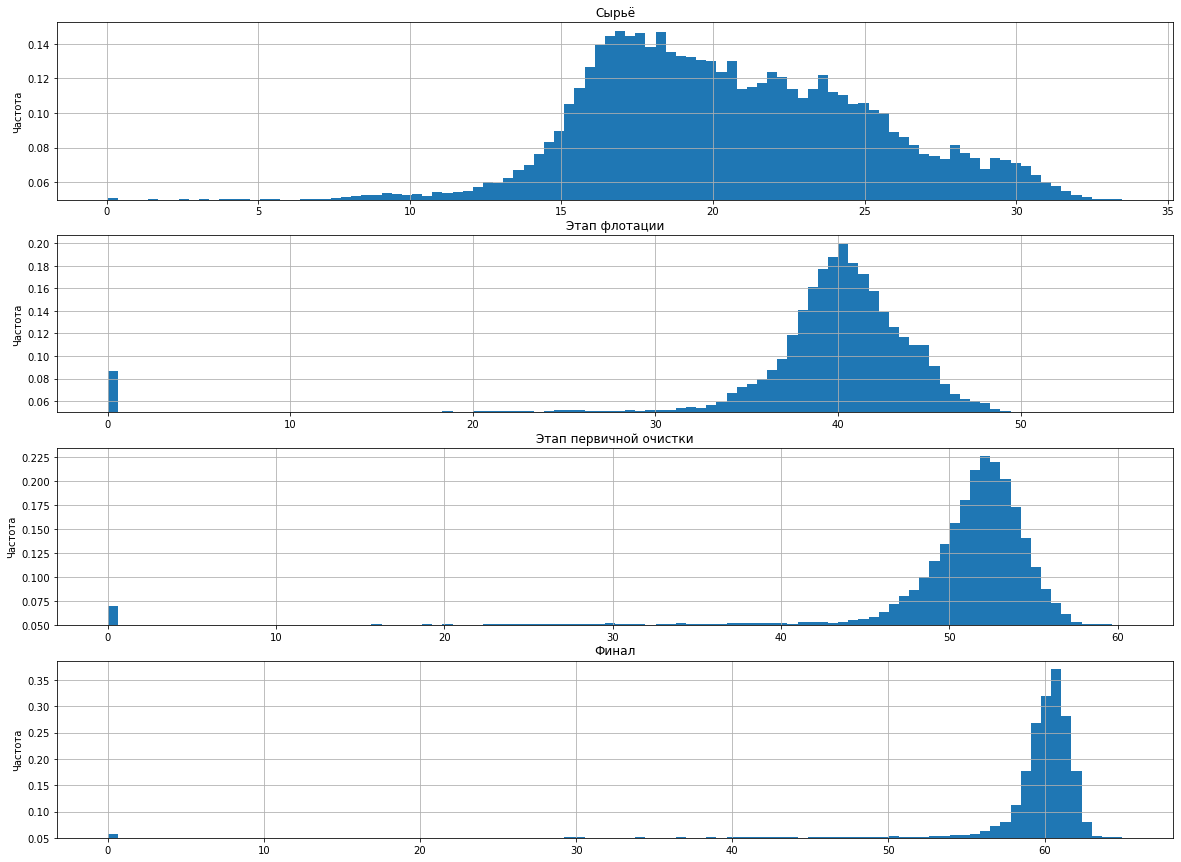

In [18]:
fig = plt.figure()
ax_1 = fig.add_subplot(4, 1, 1)
ax_2 = fig.add_subplot(4, 1, 2)
ax_3 = fig.add_subplot(4, 1, 3)
ax_4 = fig.add_subplot(4, 1, 4)

all_rougher_output = pd.Series(full['rougher.output.concentrate_au'] + 
                               full['rougher.output.concentrate_pb'] + 
                               full['rougher.output.concentrate_ag']) 
all_rougher_input = pd.Series(full['rougher.input.feed_au'] + 
                              full['rougher.input.feed_pb'] + 
                              full['rougher.input.feed_ag'])
all_primary_cleaner_output = pd.Series(full['primary_cleaner.output.concentrate_au'] + 
                                       full['primary_cleaner.output.concentrate_pb'] + 
                                       full['primary_cleaner.output.concentrate_ag']) 
all_final_output = pd.Series(full['final.output.concentrate_au'] + 
                             full['final.output.concentrate_pb'] + 
                             full['final.output.concentrate_ag']) 

all_rougher_input.hist(ax = ax_1, bins = 100, figsize = (20, 15), bottom = 0.05, label = 'после флотации', density = True)
all_rougher_output.hist(ax = ax_2, bins = 100, figsize = (20, 15), bottom = 0.05, label = 'до флотации', density = True)
all_primary_cleaner_output.hist(ax = ax_3, bins = 100, figsize = (20, 15), bottom = 0.05, label = 'после первичной очистки', density = True)
all_final_output.hist(ax = ax_4, bins = 100, figsize = (20, 15), bottom = 0.05, label = 'финал', density = True)


ax_1.set_title('Сырьё')
ax_2.set_title('Этап флотации')
ax_3.set_title('Этап первичной очистки')
ax_4.set_title('Финал')

ax_1.set_ylabel('Частота')
ax_2.set_ylabel('Частота')
ax_3.set_ylabel('Частота')
ax_4.set_ylabel('Частота')

ax3.set_xlabel('Суммарная концентрация металлов')


plt.show()

<b>ВЫВОД:</b> в течение процесса обогащения руды концентрация металлов увеличивается, а также плотнее "концентрируется" вокруг среднего. Распределение концентрации металлов в сырье не похоже на нормальное, остальные +/- приближены к гауссовскому, или дополнительно имеют  короткий хвост в области низких относительно среднего значений.  

---------

**Разбор выбросов:**

1) Нулевые аномалии в суммарных концентрациях должны быть удалены. Дело в том, что  *нулевые*  концентрации в "суммарной руде" (соли+золото+серебро+свинец) невозможны. А если мы имеем ноль, значит большая вероятность неточности измерений.
   
2) Предложу свою концепцию: вроде явный выброс виден только на all_rougher_output. Остальные жмутся к верхним краям "усов", как градиентом - что выглядит естественно и логично. Не выброс - а просто необычно большое, но закономерное значение. Тем более с нижней границей усов то же самое происходит *(см. ниже)*. 

3) Вопрос с выбросами в принципе должен будет вынести на обсуждение. Обращаемся к цели исследования: предсказывать модель на реальных данных. Выбросы - это и есть реальная концентрация. И важно, чтобы модель умела и их тоже видеть и обрабатывать. Если их убрать из модели, то получится, что у нас она станет как бы искусственной. Т.е. будет работать только в небольших диапазонах - потому что обучалась только в них.

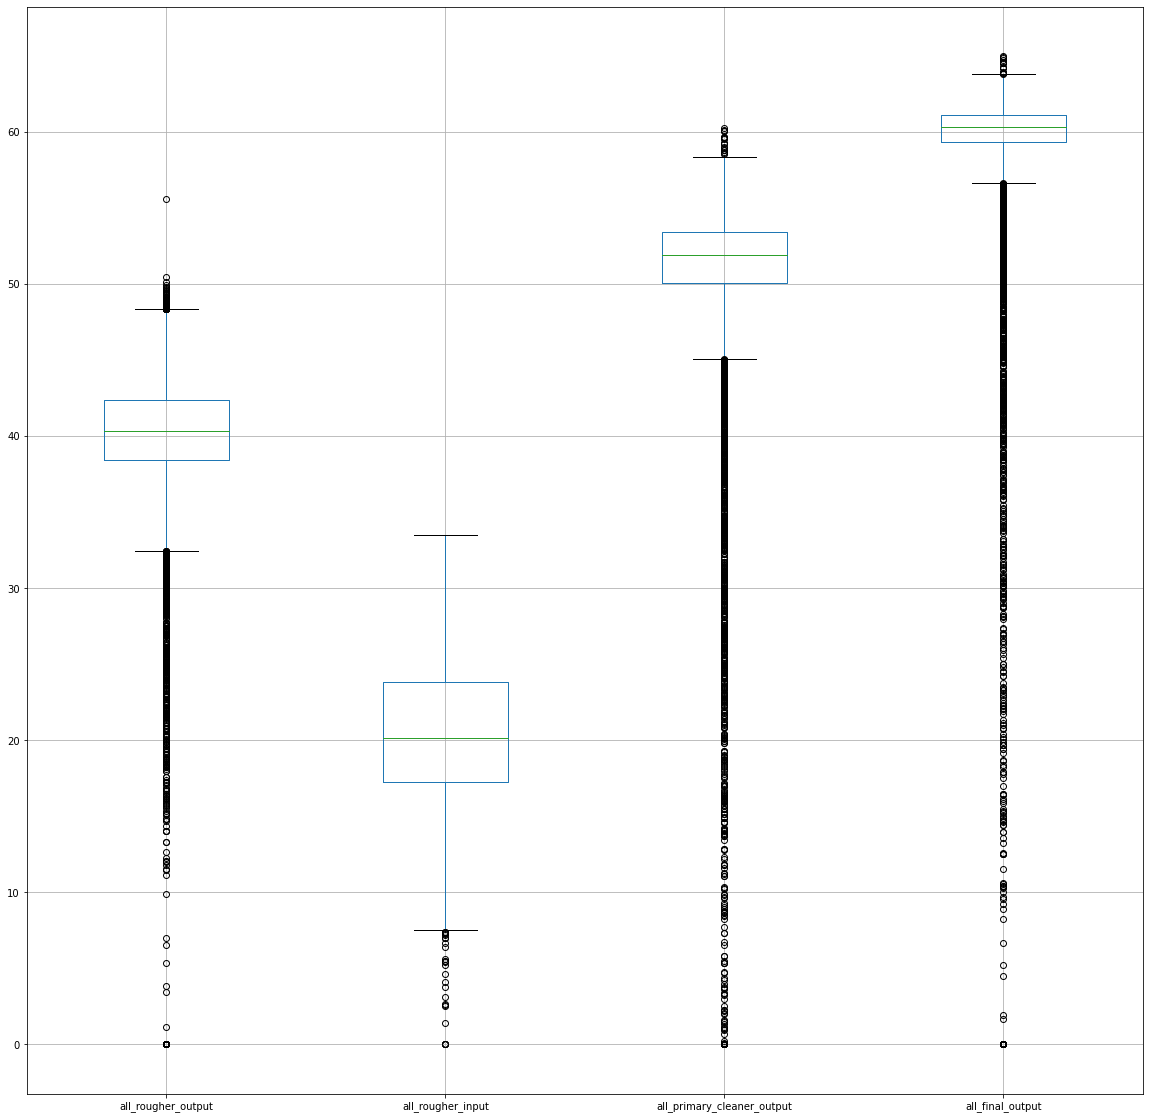

In [19]:
a = pd.DataFrame(all_rougher_output)
a = a.rename(columns = {0:'all_rougher_output'})

b = pd.DataFrame(all_rougher_input)
b = b.rename(columns = {0:'all_rougher_input'})

c = pd.DataFrame(all_primary_cleaner_output)
c = c.rename(columns = {0:'all_primary_cleaner_output'})

d = pd.DataFrame(all_final_output)
d = d.rename(columns = {0:'all_final_output'})

all_data = pd.concat([a, b, c, d], axis=1)
all_data.boxplot(figsize = (20, 20))
plt.show()


## Построение прототипа модели

Переходим к построению модели. В исследовании применим мультитаргетную модель линейной регрессии или случайного леса (целевойй признако - числовой). Качество модели будем оценивать кросс-валидацией (небольшое количество данных), ориентируясь на кастомную метрику sMAPE. 

**Задача:** 
1. Подготовить обучающие признаки и целевой признак:
    - Из датасета `train` удалить все столбцы, которых нет в `test`.
    - По дате восстановить ответы, или реальные значения, целевого признака выборки `test`.
2. Написать формулу расчёта sMAPE. 
3. Протестировать несколько моделей и оценить их качество и выбрать лучшую. 
4. Оценить модель на тестовой выборке.
_______________________________________
### Подготовка признаков

In [20]:
#некоторые подготовительные работы
columns_list = test.columns.tolist()
datelist = test['date'].tolist()

# обозначим целевой признак и признаки для обучения
features_train = train[columns_list].drop('date', axis = 1)
target_train = train[['rougher.output.recovery', 'final.output.recovery']]
features_test = test.drop('date', axis = 1)
target_test = full.loc[full['date'].isin(datelist)][['rougher.output.recovery', 'final.output.recovery']]

In [21]:
features_train.shape, features_test.shape

((14149, 52), (5290, 52))

### Кастомная метрика для оценки качества

In [22]:
def smape(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = abs(y_true) + abs(y_pred) / 2
    result = (error / scale).mean()
    return result
 

def resulting_smape(y_true, y_pred):
    y_true.reset_index(drop=True, inplace=True)
    y_pred = pd.DataFrame(data=y_pred)
    rougher = smape(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    final = smape(y_true.iloc[:, 1], y_pred.iloc[:, 1])
    return 0.25 * rougher + 0.75 * final

### Выбор модели

In [23]:
model1 = LinearRegression()
model2 = RandomForestRegressor(random_state = 123)

In [24]:
smape_score = make_scorer(resulting_smape, greater_is_better=False)

In [25]:
scores1 = cross_val_score(model1, features_train, target_train, cv=5, scoring = smape_score)
print('sMAPE линейной регрессии:', scores1.mean()*-100)

sMAPE линейной регрессии: 8.90249369725408


In [26]:
scores2 = cross_val_score(model2, features_train, target_train, cv=5, scoring = smape_score)
print('sMAPE случайного леса:', scores2.mean()*-100)

sMAPE случайного леса: 8.486687728270327


______________________________________
### Подбор гиперпараметров

In [27]:
#до подбора гиперпараметров
model2 = RandomForestRegressor(random_state = 123)
model2.fit(features_train, target_train)
predictions = model2.predict(features_test)
print(resulting_smape(target_test, predictions)*100)

7.586295718321632


In [28]:
#после подбора гиперпараметров
model2 = RandomForestRegressor(random_state = 123, max_depth = 2)
scores1 = cross_val_score(model2, features_test, target_test, cv=5, scoring = smape_score)
print('sMARE:', scores1.mean()*-100)

sMARE: 7.277634515717183


<b>ВЫВОД:</b> мы уменьшили метрику с 9 до 7.27 т.е. улучшили качество модели.